# Loading and Cleaning the Data

## Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics DPP Solution /Dataset/retail_transactions.csv")
df.head()

,Customer ID,Product Name,Quantity,Price,Total Sales,Purchase Date
0,103,Product A,7,50,350,2021-01-01 0:00:00
1,180,Product D,7,10,70,2021-01-01 8:44:41
2,93,Product C,2,10,20,2021-01-01 17:29:22
3,15,Product B,2,10,20,2021-01-02 2:14:03
4,107,Product A,1,50,50,2021-01-02 10:58:44


In [37]:
# Check for missing values in each column
print(df.isnull().sum())

Customer ID      0
Product Name     0
Quantity         0
Price            0
Total Sales      0
Purchase Date    0
dtype: int64


In [ ]:
# Fill missing numerical values (e.g., Price column) with mean
# df['Price'] = df['Price'].fillna(df['Price'].mean())

# Example for categorical column (e.g., Product Name)
# df['Product Name'] = df['Product Name'].fillna(df['Product Name'].mode()[0])

In [39]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [40]:
# Create a new column 'Total Sales'
df['Total Sales'] = df['Quantity'] * df['Price']

# Check the updated DataFrame
print(df[['Quantity', 'Price', 'Total Sales']].head())

   Quantity  Price  Total Sales
0         7     50          350
1         7     10           70
2         2     10           20
3         2     10           20
4         1     50           50


In [41]:
# Group by 'Customer ID' and calculate the sum of 'Total Sales'
customer_sales = df.groupby('Customer ID')['Total Sales'].sum().reset_index()

# Rename column for clarity
customer_sales.columns = ['Customer ID', 'Total Sales']

# Display the result
print(customer_sales.head())

   Customer ID  Total Sales
0            1          890
1            2          950
2            3          820
3            4          520
4            5          640


#### Q1. How do filter out customers who have made less than 5 purchases? Provide the code for this filtering.

#### Q2. Filter the dataset to show only the customers who have made more than 5 purchases. Provide the code for this filtering.


In [51]:
# Count purchases (rows) per customer
purchase_counts = df['Customer ID'].value_counts()

# Get customer IDs with more than 5 purchases
customers_over_5 = purchase_counts[purchase_counts > 5].index

# Filter the original DataFrame
filtered_df_over_5 = df[df['Customer ID'].isin(customers_over_5)]

# Display filtered data
print("Customers with more than 5 purchases:")
filtered_df_over_5.head()

Customers with more than 5 purchases:


,Customer ID,Product Name,Quantity,Price,Total Sales,Purchase Date
0,103,Product A,7,50,350,2021-01-01 0:00:00
1,180,Product D,7,10,70,2021-01-01 8:44:41
2,93,Product C,2,10,20,2021-01-01 17:29:22
3,15,Product B,2,10,20,2021-01-02 2:14:03
6,189,Product D,8,30,240,2021-01-03 4:28:06


In [50]:
# Count purchases (rows) per customer
purchase_counts = df['Customer ID'].value_counts()

# Get customer IDs with less than 5 purchases
customers_less_5 = purchase_counts[purchase_counts < 5].index

# Filter the original DataFrame
filtered_df_less_5 = df[df['Customer ID'].isin(customers_less_5)]

# Display filtered data
print("Customers with less than 5 purchases:")
filtered_df_less_5.head()

Customers with less than 5 purchases:


,Customer ID,Product Name,Quantity,Price,Total Sales,Purchase Date
4,107,Product A,1,50,50,2021-01-02 10:58:44
5,72,Product E,8,30,240,2021-01-02 19:43:25
11,88,Product E,1,30,30,2021-01-05 0:11:32
13,100,Product A,3,50,150,2021-01-05 17:40:54
17,150,Product D,2,40,80,2021-01-07 4:39:38


In [52]:
# Calculate average of the 'Total Sales' column
average_total_sales = df['Total Sales'].mean()

print(f"Average Total Sales: {average_total_sales:.2f}")

Average Total Sales: 152.49


Q9. Identify the Top 5 Selling Products by Total Sales

Concept: Group by Product Name, sum the Total Sales, and sort descending.

In [53]:
# Group by Product Name and sum Total Sales
product_sales = df.groupby('Product Name')['Total Sales'].sum().reset_index()

# Sort in descending order and get top 5
top_5_products = product_sales.sort_values(by='Total Sales', ascending=False).head(5)

print("Top 5 Selling Products by Total Sales:")
print(top_5_products)

Top 5 Selling Products by Total Sales:
  Product Name  Total Sales
4    Product E        32000
0    Product A        31770
1    Product B        29970
2    Product C        29490
3    Product D        29260


Q10. Identify the Top 5 Customers by Total Spending

Concept: Group by Customer ID, sum the Total Sales, and sort descending.

In [54]:
# Group by Customer ID and sum Total Sales
customer_spending = df.groupby('Customer ID')['Total Sales'].sum().reset_index()

# Sort in descending order and get top 5
top_5_customers = customer_spending.sort_values(by='Total Sales', ascending=False).head(5)

print("Top 5 Customers by Total Spending:")
print(top_5_customers)

Top 5 Customers by Total Spending:
     Customer ID  Total Sales
87            90         2260
110          113         1900
52            54         1850
144          147         1820
106          109         1780


Q11. Bar Chart of Total Sales by Product

Concept: Group by product, sum sales, and use plt.bar().

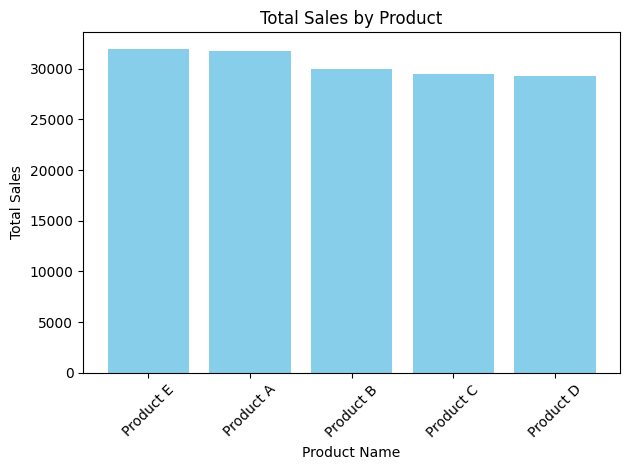

In [56]:
import matplotlib.pyplot as plt

# Group by Product Name and sum Total Sales
product_sales = df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False)

# Plot bar chart
plt.bar(product_sales.index, product_sales.values, color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q12. Line Plot of Sales Over Time (Monthly)

Concept: Convert Purchase Date to datetime, group by month, and plot using plt.plot().

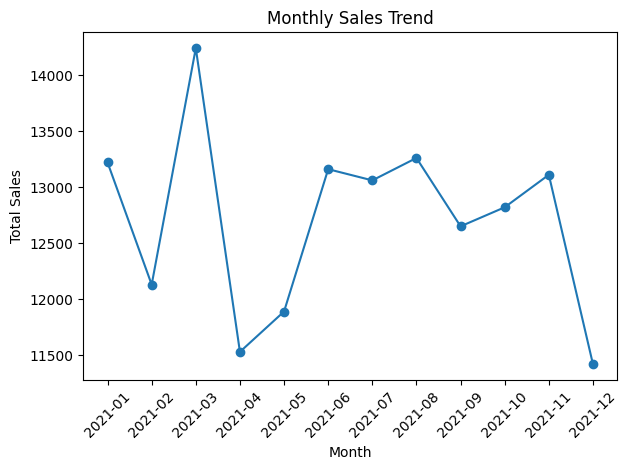

In [57]:
# Convert Purchase Date to datetime if not already
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create a new column for Month-Year
df['Month'] = df['Purchase Date'].dt.to_period('M')

# Group by Month and sum Total Sales
monthly_sales = df.groupby('Month')['Total Sales'].sum()

# Plot line chart
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q13. Histogram of Total Sales

Concept: Use plt.hist() to show the distribution of individual transaction sales.

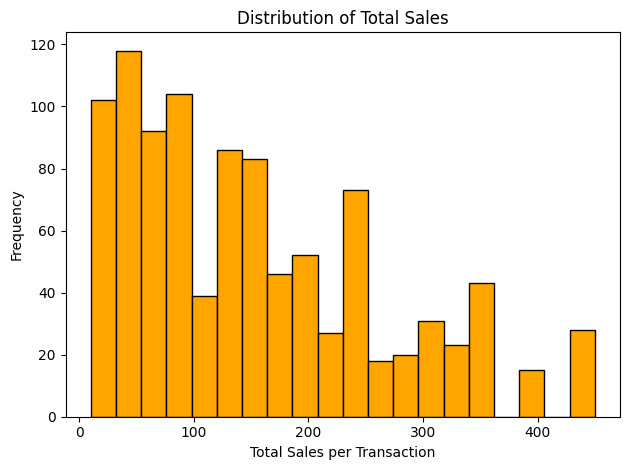

In [58]:
# Plot histogram
# plt.figure(figsize=(8, 5))
plt.hist(df['Total Sales'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales per Transaction')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 14. Analyze the Sales Trends (Line Plot)

Question: What do the sales trends reveal?

Ans:-

The line plot of monthly sales shows that there are noticeable fluctuations in sales over time.

- Certain months show significant spikes, which could be due to seasonal promotions, festive periods, or marketing campaigns.

- Similarly, there are drops in some months, possibly due to off-season periods, low demand, or reduced customer activity.

- Overall, the trend helps identify peak months for sales planning and low periods for improvement.

Q15. Key Insights from Bar Chart and Histogram

Question: What can you conclude from the top products bar chart and the sales distribution histogram?

Ans:-

1. Bar Chart Insights:
- The bar chart highlights the top 5 best-selling products in terms of total sales. These products contribute significantly to overall revenue and are likely high in demand.

- Focused promotion of these products can drive more sales.

- Cross-selling related products might also help.

2. Histogram Insights:
- The histogram shows that most transactions fall within a lower sales range, with fewer high-value transactions.

- This indicates that while high-value sales exist, small and frequent purchases dominate.

- There is room to increase average order value.

## Q16. Recommendations to Improve Sales and Target High-Value Customers

Question: Based on your findings, what recommendations would you give to the retail company?

1. Target Top Customers:

- Focus retention campaigns on high-spending customers (top 5%) through personalized offers or loyalty programs.

2. Promote Best-Selling Products:

- Leverage the popularity of top 5 products in ads, homepage banners, and discount bundles.

- Explore variants or complementary products to increase basket size.

3. Boost Low-Sales Months:

- Run seasonal promotions, flash sales, or email campaigns during low-sales months to drive engagement.

4. Increase Average Transaction Value:

- Use strategies like "Buy more, save more", free shipping thresholds, and product recommendations.

5. Investigate Low-Performing Products:

- Review and optimize inventory or pricing for products with consistently low sales.

